In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation_1.csv')

In [3]:
df.shape

(3548, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7774.0,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


In [5]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [6]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 92,0.45,3,3,1,10.0,Relatively New,833.0,0,0,0,0,0,0,0
1,flat,sector 79,2.01,3,4,3+,6.0,Relatively New,2141.0,0,1,0,0,0,0,158
2,flat,sector 62,7.15,4,5,3+,7.0,Relatively New,3925.0,1,1,1,0,0,1,158
3,flat,sector 79,1.10,2,2,3+,4.0,New Property,1223.0,0,0,0,0,0,1,49
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


In [8]:
train_df[['price','bedRoom','bathroom','floorNum','built_up_area','study room','servant room','pooja room','store room','others','furnishing_type','luxury_score']].corr()

,price,bedRoom,bathroom,floorNum,built_up_area,study room,servant room,pooja room,store room,others,furnishing_type,luxury_score
price,1.000000,0.592081,0.610622,-0.088183,0.748561,0.242818,0.391638,0.319825,0.305530,-0.012593,0.224839,0.090626
bedRoom,0.592081,1.000000,0.812471,-0.084892,0.605664,0.142610,0.373646,0.279670,0.196889,0.029578,0.202585,0.067940
bathroom,0.610622,0.812471,1.000000,-0.043270,0.610488,0.150028,0.476931,0.284476,0.207670,0.038306,0.238479,0.146680
floorNum,-0.088183,-0.084892,-0.043270,1.000000,0.004568,-0.051808,0.102487,-0.056971,-0.091957,-0.006034,0.033874,0.172676
built_up_area,0.748561,0.605664,0.610488,0.004568,1.000000,0.169926,0.422741,0.249839,0.195645,-0.010462,0.169922,0.142219
study room,0.242818,0.142610,0.150028,-0.051808,0.169926,1.000000,0.169490,0.294447,0.220784,0.020698,0.132919,0.140737
servant room,0.391638,0.373646,0.476931,0.102487,0.422741,0.169490,1.000000,0.234889,0.152857,-0.021293,0.251723,0.330197
pooja room,0.319825,0.279670,0.284476,-0.056971,0.249839,0.294447,0.234889,1.000000,0.305912,0.023248,0.192281,0.177197
store room,0.305530,0.196889,0.207670,-0.091957,0.195645,0.220784,0.152857,0.305912,1.000000,-0.105891,0.136925,0.183652
others,-0.012593,0.029578,0.038306,-0.006034,-0.010462,0.020698,-0.021293,0.023248,-0.105891,1.000000,0.054456,-0.055066


<Axes: >

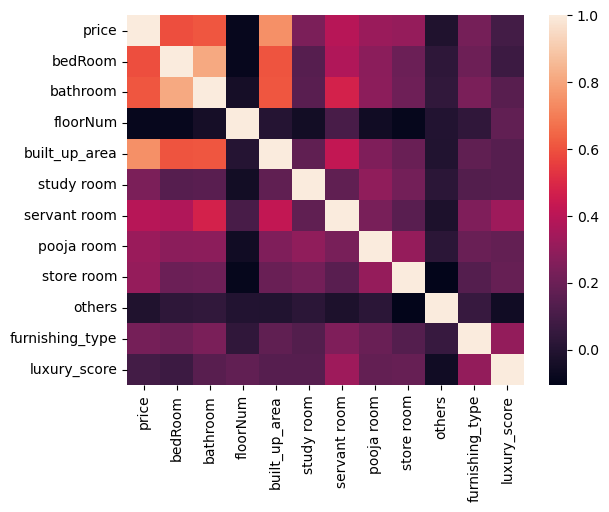

In [9]:
sns.heatmap(train_df[['price','bedRoom','bathroom','floorNum','built_up_area','study room','servant room','pooja room','store room','others','furnishing_type','luxury_score']].corr())

In [10]:
train_df[['price','bedRoom','bathroom','floorNum','built_up_area','study room','servant room','pooja room','store room','others','furnishing_type','luxury_score']].corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748561
bathroom           0.610622
bedRoom            0.592081
servant room       0.391638
pooja room         0.319825
store room         0.305530
study room         0.242818
furnishing_type    0.224839
luxury_score       0.090626
others            -0.012593
floorNum          -0.088183
Name: price, dtype: float64

In [13]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession